# seaborn kütüphanesi ile istatistiksel veri görselleştirme

*seaborn*, Python için geliştirilmiş, istatistiksel veri görselleştirme yapmak amacıyla optimize edilmiş bir kütüphanedir. *matplotlib* altyapısını kullanmaktadır ve *pandas* kütüphanesi ile çok iyi bir şekilde entegre olmuştur.

## Neden *seaborn* kullanalım?

Öncelikle tek bir resimle cevap vereceğim sizlere. Aşağıdaki grafiklerin güzelliğine, renk seçiminin ahengine ve içlerindeki bilgi anlatma kapasitesine bakar mısınız? Bence tek kelimeyle şahane!

![seaborn_examples.png](seaborn_examples.png)

Hala ikna olmadıysanız:
* *seaborn* çok güzel görselleştirmeleri çok kısa kodlarla yapmanıza olanak sağlar.
* Veri analizleriniz için *pandas* kullanıyorsanız sizin için biçilmiş kaftandır. 
* İstatistiksel analizler için optimize edilmiştir.
* Veri bilimciler arasında oldukça bilindik ve yaygın bir araçtır.

Özetle öğrenin bence size çok şey katabilir :)

## seaborn hakkında bazı "gereksiz" bilgiler :)

Bu kısmı gönül rahatlığıyla geçebilirsiniz ama okumanızı tavsiye ederim.
* seaborn genellikle sns olarak import edilir. Yani `import seaborn as sns` kalıbı kullanılır. Bunu herhangi bir şekilde kullanmakta özgürsünüz tabi isterseniz elma diye import edin farketmez.
* `seaborn` ismi "The West Wing" (1999-2006) adlı dizideki *Samuel Norman "Sam" Seaborn* karakterinden gelmektedir. 
* Bu karakterin baş harfleri SNS'dir.
* Bir de resmini koyayım, ben de ilk defa görmüş olacağım kendisini :)

![sns.jpg](sns.jpg)
<p style="text-align: center;"> <i>Samuel Norman "Sam" Seaborn<i> </p>
    <p style="text-align: center;"> <i>Ron Lowe tarafından The West Wing dizisinde Beyaz Saray İletişim Direktör Yardımcısı olarak canlandırılmış<i> </p>

 ## *seaborn* kullanmayı öğrenelim

*seaborn* kullanmayı örnek yaparak öğrenelim istiyorum. İlerleyen kısımlarda *seri halde* örnekler bulacaksınız. Örnekler temel kavramlardan başlayıp daha ileri seviyelere doğru uzanacak.

>Eğer Python ortamınızda *seaborn* kurulu değilse [bağlantıdaki](https://seaborn.pydata.org/installing.html) yöntemleri kullanarak kurulum yapabilirsiniz.

<div class="alert alert-success">
Örneklere başlamadan önce bir tekrara ihtiyaç duyuyorsanız *matplotlib* ve *pandas* bilgilerinizi gözden geçirmenizde fayda var. Sitemizde bu konularla ilgili çok güzel yazılar mevcut :)  
    <br><a href="https://www.datafloyd.com/tr/python-pandas-kutuphanesine-giris/">“pandas” kütüphanesine giriş</a>
    <br><a href="https://www.datafloyd.com/tr/pyhton-matplotlib-kutuphanesini-kullanarak-veri-gorsellestirme-temel-grafikler%C2%B6/">“matplotlib” kütüphanesini kullanarak temel görselleştirme</a>
    <br><a href="https://www.datafloyd.com/tr/matplotlib-ile-ileri-seviye-gorsellestirme/">"matplotlib" ile ileri seviye görselleştirme</a>

</div>

### İlk önce biraz veri gerekli

*seaborn* ile rahat çalışabilmek için *numpy*, *pandas* ve *matplotlib* kütüphanelerini `import` edelim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Bunu da ekleyelim ki grafikler daha iyi görünsün
%matplotlib notebook 
# yukarıda o kadar bahsettik bu notasyona uyalım bari :)
import seaborn as sns

>`seaborn` 0.8 sürümünden itibaren kendi stilini otomatik olarak eklemiyor. Neden böyle bir karar alındı bilmiyorum ama bunun bize etkisi şu: gerçek `seaborn` stilinde grafikler elde etmek için aşağıdaki kod satırını eklememiz lazım 

In [2]:
sns.set(style="darkgrid")

*seaborn* kütüphanesinde örnekleri daha rahat yapabilmemiz için çeşitli veri setleri sunulmuş. `load_dataset` fonksiyonuyla bu veri setlerini bir *pandas* "dataframe" yapısına atabiliyoruz. Halihazırdaki verisetleri ise şöyle:
* anscombe: 
* attention
* brain_networks
* car_crashes
* diamonds
* dots
* exercise
* flights
* fmri
* gammas
* iris
* mpg
* planets
* tips
* titanic

Elmasları çeşitli özelliklerine göre inceleyen bir veriseti olan "diamonds"u yükleyelim ve *"Shine on you crazy diamond"* diyelim hep birlikte ;) <br> Not: Veri setini yüklediğiniz anda internetten indirme gerçekleştirecektir. 

In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
type(diamonds)

pandas.core.frame.DataFrame

Yükleme yapılan nesnenin bir `pandas.core.frame.DataFrame` olduğunu doğrulamış olduk

In [5]:
# ilk iş biraz verinin içeriğine bakmak lazım
diamonds.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


7 nümerik, 3 tane obje tipinde değişkene sahip

In [7]:
# cut, color ve clarity için değerler
print(diamonds.cut.unique())
print(diamonds.color.unique())
print(diamonds.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<div class="alert alert-info">
  Merak ettim araştırdım bu alanların ne anlama geldiğini :) Siz de bakmak isterseniz aşağıdaki bağlantıda güzel bir kaynak var. <br>
  <a href="https://www.bluenile.com/education/diamonds/color?track=SideNav">"Diamond Education"</a>
</div>

### Örnek 1: `relplot` ile ikili (ve daha fazla?) değişken analizi

`relplot` dediğimiz şey aslında `scatter plot`un biraz yakışıklısı ve yeteneklisi. Yukarıda hazırladığımız veri seti üzerinde biraz denemeler yapalım.  Ana konumuz ikili değişken fakat daha fazla değişkeni de gözlemliyebiliyoruz. Ne demek istediğimi birazdan anlayacaksınız.

>Burada ilk dikkat etmemiz gereken şey `relplot` fonksiyonunun pandas dataframe almasıdır

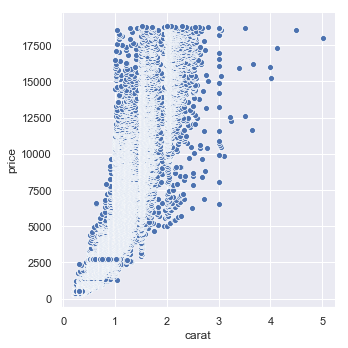

In [13]:
# x ekseninde carat değerini y ekseninde fiyatını çizdirelim
sns.relplot(x="carat",y="price",data=diamonds)

Grafik güzel ama çok veri noktası olduğu için biraz kalabalık görünüyor. Bu sebeple biraz üzerinde oyanayalım

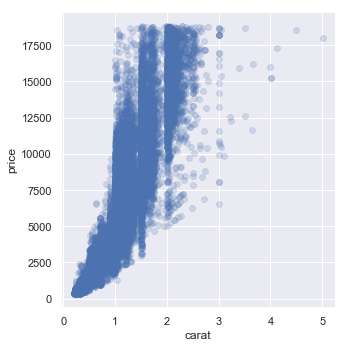

In [14]:
# Biraz alpha verelim ve 
sns.relplot(x="carat",y="price",data=diamonds,alpha=0.2,edgecolor=None)

Genel olarak karat arttıkça fiyat artıyor gibi ne dersiniz? Ama her zaman değil yani karatı küçük olup 5 karatlık elmas kadar fiyatı olanlar da var.  

Bunu daha iyi anlamak için bir boyut daha ekleyelim. Fakat ekleyeceğimiz boyut renk skalasını değiştirmek olacak. Şaşırdınız di mi:) Yani demek istediğim rengi bir değişkene atayalım ve bakalım neler olacak. Bunu `seaborn` ile yapmak oldukça kolay. Sadece `hue` parametresini değiştiriyorsunuz ve gelsin sonuçlar...

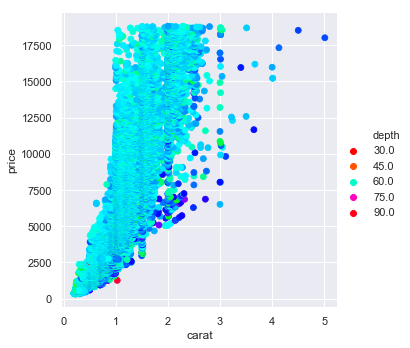

In [15]:
# depth değişkenini ekleyelim renk olarak
sns.relplot(x="carat",y="price",
            hue = "depth", # renk eksenine ekledik
            data=diamonds,
            palette ="hsv", # renk paletini de değiştirelim
            edgecolor=None)

Ne yalan söyleyeyim bana bir anlam ifade etmedi bu grafik. Başka bir değişken deneyelim isterseniz. Mesela nümerik birşey değil de `object` olan bir şeyi `hue` parametresi olarak ayarlayalım (mesela "color") bakalım neler olacak.

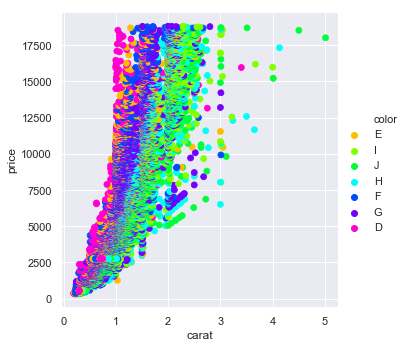

In [16]:
# color değişkenini ekleyelim renk olarak
sns.relplot(x="carat",y="price",
            hue = "color", # renk eksenine ekledik
            data=diamonds,
            palette ="hsv", # renk paletini de değiştirelim
            edgecolor=None)

Şimdi güzel oldu, karatı düşük olsa bile color "D" olduğu zaman elmasın fiyatının çok arttığını görüyoruz. Yukarıda elmasların kalitesni anlatan bir link vermiştim hatırlarsanız. Orada linke göre "color D" çok iyiymiş zaten :)

![color_d.png](color_d.png)

>*Renk değişkenini* bir eksen/boyut olarak kullandık gördüğünüz gibi peki başka bir eksenlerde kullanabilir miyiz benzer şekilde? Cevabımız tabii ki evet! Mesela `style` ve `size` değişkenlerini atayalım

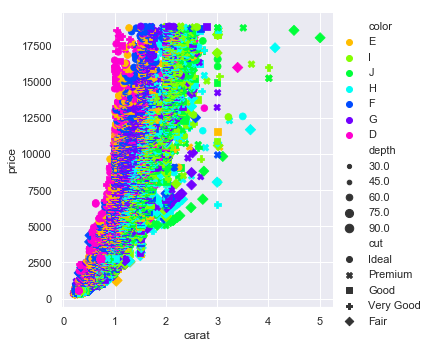

In [17]:
# color değişkenini ekleyelim renk olarak
sns.relplot(x="carat",y="price",
            hue = "color", # renk eksenine ekledik
            style = "cut",
            size= "depth",
            data=diamonds,
            palette ="hsv", # renk paletini de değiştirelim
            edgecolor=None)

>Şekil çok karıştı tabi buna kafanızı takmayın. **Burada dikkatiniz çekmek istediğim nokta `seaborn` kütüphanesinin ne kadar esnek olduğu** ve sadece tek satılık kod ile ne kadar bilgi içeriği yüksek görselleştirmeler oluşturabileceğinizdir!

### `relplot` fonksiyonu ile çizgi grafikleri göstermek

Bunun için yeni bir veri setine ihtiyacımız olacak. Yukarıdaki elmas veri seti bu iş için çok uygun olmayabilir. Önce sentetik bir veri yaratalım.

In [ ]:
np.random.seed(42)
df = pd.DataFrame(dict(time=np.arange(500), # 500'e kadar artan bir veri
                       # rasgele hazırlanmış bir seriyi toplayarak sonuna kadar gidelim
                       value=np.random.randn(500).cumsum()) )


Şimdi bunu çizdirelim sadece `kind` parametresini `line` olarak değiştireceğiz. Bu parametre varsayılan değer olarak `scatter`a eşitlenmiş durumda.

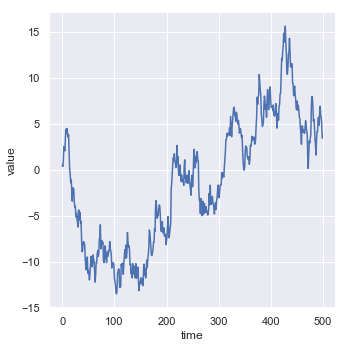

In [25]:
sns.relplot(x="time", y="value", kind="line", data=df)

İşleri biraz daha ilginç hale getirmek için öncelikle yeni bir veri seti yükleyelim.

In [28]:
fmri = sns.load_dataset("fmri")
fmri.describe(include="all")

,subject,timepoint,event,region,signal
count,1064,1064.000000,1064,1064,1064.000000
unique,14,NaN,2,2,NaN
top,s12,NaN,stim,parietal,NaN
freq,76,NaN,532,532,NaN
mean,NaN,9.000000,NaN,NaN,0.003540
std,NaN,5.479801,NaN,NaN,0.093930
min,NaN,0.000000,NaN,NaN,-0.255486
25%,NaN,4.000000,NaN,NaN,-0.046070
50%,NaN,9.000000,NaN,NaN,-0.013653
75%,NaN,14.000000,NaN,NaN,0.024293


Bu veri setinde bir sinyalimiz var, bu sinyal sanırım manyetik rezonans yöntemi ile toplanmış bir verinin daha sadeleştirilmiş bir hali.

Temelde `signal` ve `timepoint` olmak üzere iki tane nümerik değişkene sahip.  

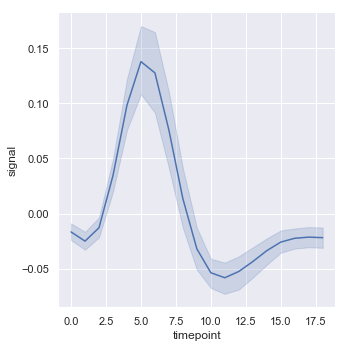

In [32]:
sns.relplot(x="timepoint", y="signal", kind="line",data=fmri)

Yukarıdaki grafik güzel de, `seaborn` neden böyle davrandı acaba?

>Çünkü `seaborn` bir zaman diliminde birden fazla ölçüm olduğunu anladı ve bu ölçümlerin ortalama ve %95 güvenirlik değerlerini gösterdi bize. 

Ne demek istediğimi biraz kod yazarak anlatayım. Öncelikle t=0 anındaki `signal` değerlerini bulalım.

t=0 anında ortalama değer
-0.01666173551577484
t=0 anında q=0.95 değeri
0.025685282807225


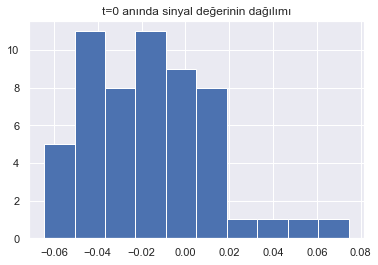

In [43]:
fmri_signal = fmri[fmri["timepoint"]==0]["signal"]
plt.hist(fmri_signal);
plt.title("t=0 anında sinyal değerinin dağılımı")
print("t=0 anında ortalama değer")
print(np.mean(fmri_signal))
print("t=0 anında q=0.95 değeri")
print(np.quantile(fmri_signal,q=0.95))

"confidence interval" çizdirmek yerine standart deviasyonu da çizdirmek mümkün. Bunun için `ci="sd"` parametresini eklememiz lazım.

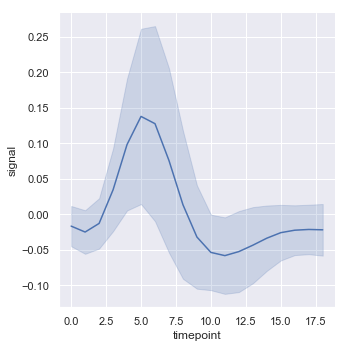

In [44]:
sns.relplot(x="timepoint", y="signal", kind="line",data=fmri, ci="sd")

İlk örnekteki `hue`,`size` ve `style` parametrelerini hatırladınız değil mi? bu parametreyi burada uygularsak ne olur sizce?

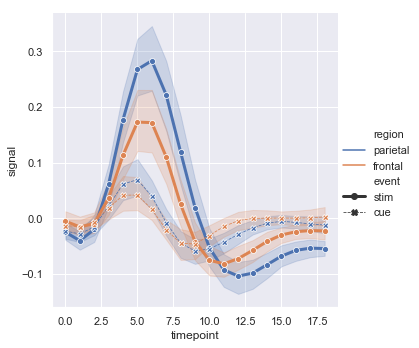

In [53]:
sns.relplot(x="timepoint", y="signal", 
            hue = "region", 
            size="event",
            style = "event",
            markers = True,
            kind="line",data=fmri )

Vay beeee, dediğinizi duyar gibiyim. Baştaki, neden `seaborn` öğrenmelisiniz kısmına artık sizin için gerek yok sanırım :)

Aynı zaman anında birden fazla veri olması, bu veri seti için aslında birden fazla denekten alınan verileri temsil etmekte. Bazen bu verileri tek tek çizgi grafik halinde görmeyi de tercih edebiliriz.

>`estimator=None` yapmayı unutmayın yoksa hata alırsınız.

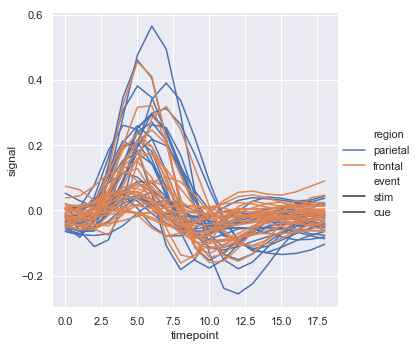

In [66]:
sns.relplot(x="timepoint", y="signal", 
            units ="subject", 
            estimator=None,
            hue="region",
            style="event",
            dashes=False,
            kind="line",data=fmri)